We will do : 
- Plot a bar graph to show the rating distribution. Means that, a bar chart shows how many business are rated as 1 star, 1.5 stars and so on
- Find a way to find the unique categories, and plot a bar chart to show 20 most popular categories
- Plot a bar chart to show top 20 cities that have the most number businesses
- Select 1 city, then:
- filter out all businesses in that city 
- find the 5 most popular business categories.
- plot a bar chart to show the amount of checkins by hours of each business in the top 5 above ( meaning, x-axis is the hours, and y-axis is the amount of checkins).
- do the checkins analysis for every day of a week

Data are here: https://drive.google.com/file/d/12oZGvQ9BYFvZBMImRyRDt6uxKr4_Pc_q/view?usp=sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from collections import Counter 
  
       
%matplotlib inline

In [2]:
business_df = pd.read_csv('./YelpCompleteData_no_review_no_user/yelp_business.csv')

In [3]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [4]:
business_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [6]:
# what 'stars' means in the business, what are the unique values
unique_stars = sorted(business_df['stars'].unique())
unique_stars
    

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [7]:
business_df_values = business_df['stars'].value_counts().sort_index()
business_df_values

1.0     3788
1.5     4303
2.0     9320
2.5    16148
3.0    23142
3.5    32038
4.0    33492
4.5    24796
5.0    27540
Name: stars, dtype: int64

<BarContainer object of 9 artists>

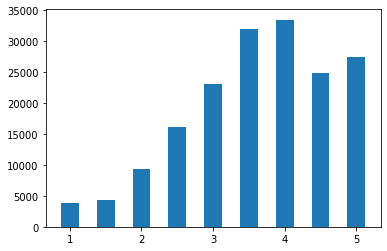

In [8]:
# how many businesses for a given star
plt.bar(x = unique_stars, height = list(business_df_values), width = 0.25)

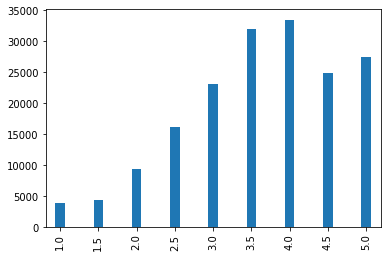

In [9]:
business_df_values.sort_index().plot(kind = "bar", width = 0.25)

In [10]:
# we change order of columns, now most valuable columns are at the centrum
cols = list(business_df.columns.values)
cols
new_cols = ['business_id',
 'name',
 'neighborhood',
 'address',
 'city',
 'state',
 'categories',
 'stars',
 'postal_code',
 'latitude',
 'longitude',
 'review_count',
 'is_open'
           ]
business_df = business_df[new_cols]
business_df.head()

,business_id,name,neighborhood,address,city,state,categories,stars,postal_code,latitude,longitude,review_count,is_open
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,Dentists;General Dentistry;Health & Medical;Or...,4.0,85044,33.330690,-111.978599,22,1
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,3.0,15317,40.291685,-80.104900,11,1
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,Departments of Motor Vehicles;Public Services ...,1.5,85017,33.524903,-112.115310,18,1
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,Sporting Goods;Shopping,3.0,85282,33.383147,-111.964725,9,0
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,American (New);Nightlife;Bars;Sandwiches;Ameri...,3.5,44221,41.119535,-81.475690,116,1


In [11]:
# we transform the 'categories' values to list of strings
business_df["categories"] = business_df["categories"].apply(lambda x: x.split(';'))
business_df.head()

,business_id,name,neighborhood,address,city,state,categories,stars,postal_code,latitude,longitude,review_count,is_open
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,"[Dentists, General Dentistry, Health & Medical...",4.0,85044,33.330690,-111.978599,22,1
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,"[Hair Stylists, Hair Salons, Men's Hair Salons...",3.0,15317,40.291685,-80.104900,11,1
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,"[Departments of Motor Vehicles, Public Service...",1.5,85017,33.524903,-112.115310,18,1
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,"[Sporting Goods, Shopping]",3.0,85282,33.383147,-111.964725,9,0
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,"[American (New), Nightlife, Bars, Sandwiches, ...",3.5,44221,41.119535,-81.475690,116,1


In [12]:
# we transform the 'categories' values to multisets ('bags'),  i.e. Counter object
business_multi_set_df = business_df.copy()
business_multi_set_df['categories'] = business_multi_set_df["categories"].apply(lambda x: Counter(set(x)))
business_multi_set_df.head()

,business_id,name,neighborhood,address,city,state,categories,stars,postal_code,latitude,longitude,review_count,is_open
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,"{'General Dentistry': 1, 'Orthodontists': 1, '...",4.0,85044,33.330690,-111.978599,22,1
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,"{'Hair Salons': 1, 'Hair Extensions': 1, 'Blow...",3.0,15317,40.291685,-80.104900,11,1
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,"{'Public Services & Government': 1, 'Departmen...",1.5,85017,33.524903,-112.115310,18,1
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,"{'Sporting Goods': 1, 'Shopping': 1}",3.0,85282,33.383147,-111.964725,9,0
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,"{'Sandwiches': 1, 'Nightlife': 1, 'American (N...",3.5,44221,41.119535,-81.475690,116,1


In [13]:
# we extract the list of all 'bags' in 'categories' column
multi_set_categories = business_multi_set_df['categories']
list_multi_set_categories = list(multi_set_categories)
list_multi_set_categories

[Counter({'General Dentistry': 1,
          'Orthodontists': 1,
          'Cosmetic Dentists': 1,
          'Oral Surgeons': 1,
          'Dentists': 1,
          'Health & Medical': 1}),
 Counter({'Hair Salons': 1,
          'Hair Extensions': 1,
          'Blow Dry/Out Services': 1,
          'Hair Stylists': 1,
          "Men's Hair Salons": 1,
          'Beauty & Spas': 1}),
 Counter({'Public Services & Government': 1,
          'Departments of Motor Vehicles': 1}),
 Counter({'Sporting Goods': 1, 'Shopping': 1}),
 Counter({'Sandwiches': 1,
          'Nightlife': 1,
          'American (New)': 1,
          'American (Traditional)': 1,
          'Bars': 1,
          'Restaurants': 1,
          'Burgers': 1}),
 Counter({'Italian': 1, 'Restaurants': 1}),
 Counter({'Property Management': 1,
          'Real Estate': 1,
          'Home Services': 1,
          'Real Estate Services': 1}),
 Counter({'Sporting Goods': 1, 'Shopping': 1}),
 Counter({'Ice Cream & Frozen Yogurt': 1, 'Coffee & Te

In [14]:
# we combine all 'bags' in the 'categories' column in one 'big bag' 

multi_set_total_categories = reduce (lambda c, x : x + c, list_multi_set_categories, Counter(set()))
multi_set_total_categories

Counter({'Drugstores': 1532,
         'Health & Medical': 14230,
         'Shopping': 27971,
         'Spray Tanning': 319,
         'Tanning': 808,
         'Beauty & Spas': 17014,
         'Property Management': 834,
         'Real Estate': 4611,
         'Home Services': 16205,
         'Automotive': 11052,
         'Body Shops': 1046,
         'Car Dealers': 1707,
         'Ethnic Food': 782,
         'Specialty Food': 3966,
         'Imported Food': 402,
         'Food': 24777,
         'Local Services': 11232,
         'Printing Services': 965,
         'Barbers': 1713,
         'Nail Salons': 4294,
         'Hair Salons': 6140,
         'Eyelash Service': 1423,
         'Makeup Artists': 1034,
         'Nail Technicians': 140,
         'Italian': 4662,
         'Pizza': 6067,
         'Event Planning & Services': 9078,
         'Caterers': 1920,
         'Restaurants': 54618,
         'Airlines': 114,
         'Hotels & Travel': 5736,
         'Transportation': 944,
         'Sk

In [15]:
# we sort the 'big bag' in accord with value and take 20 first key:value pairs, i.e. the 20 most common businesses
top_20 = multi_set_total_categories.most_common(20)
top_20

[('Restaurants', 54618),
 ('Shopping', 27971),
 ('Food', 24777),
 ('Beauty & Spas', 17014),
 ('Home Services', 16205),
 ('Health & Medical', 14230),
 ('Nightlife', 12154),
 ('Local Services', 11232),
 ('Automotive', 11052),
 ('Bars', 10563),
 ('Event Planning & Services', 9078),
 ('Active Life', 8257),
 ('Fashion', 7019),
 ('Sandwiches', 6345),
 ('Fast Food', 6280),
 ('Hair Salons', 6140),
 ('American (Traditional)', 6097),
 ('Pizza', 6067),
 ('Coffee & Tea', 5936),
 ('Hotels & Travel', 5736)]

In [16]:
# the list of 20 most common businesses
categories_20 = list(map(lambda x: x[0], top_20))
categories_20

['Restaurants',
 'Shopping',
 'Food',
 'Beauty & Spas',
 'Home Services',
 'Health & Medical',
 'Nightlife',
 'Local Services',
 'Automotive',
 'Bars',
 'Event Planning & Services',
 'Active Life',
 'Fashion',
 'Sandwiches',
 'Fast Food',
 'Hair Salons',
 'American (Traditional)',
 'Pizza',
 'Coffee & Tea',
 'Hotels & Travel']

In [17]:
# the list of quantities of 20 most common businesses
values_20 = list(map(lambda x: x[1], top_20))
values_20

[54618,
 27971,
 24777,
 17014,
 16205,
 14230,
 12154,
 11232,
 11052,
 10563,
 9078,
 8257,
 7019,
 6345,
 6280,
 6140,
 6097,
 6067,
 5936,
 5736]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

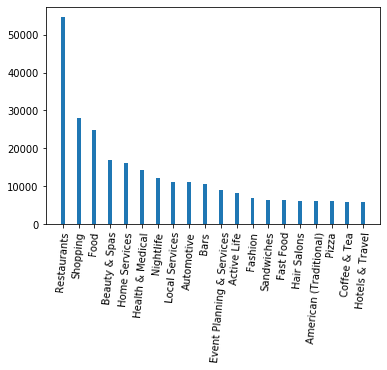

In [18]:
# we make the drawing
plt.bar(x = categories_20, height = values_20, width = 0.25)
plt.xticks(rotation=85)

In [19]:
#construct a new dataFrame where city and state are combined to new city_name (there are several Phoenix in different states)
business_multi_set_df['city_name'] = business_multi_set_df['city'].str.cat(business_multi_set_df['state'],sep=" ")
columns = ['city', 'state']
business_multi_set_df.drop(columns, inplace = True, axis = 1)
business_multi_set_df.head()


,business_id,name,neighborhood,address,categories,stars,postal_code,latitude,longitude,review_count,is_open,city_name
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""","{'General Dentistry': 1, 'Orthodontists': 1, '...",4.0,85044,33.330690,-111.978599,22,1,Ahwatukee AZ
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""","{'Hair Salons': 1, 'Hair Extensions': 1, 'Blow...",3.0,15317,40.291685,-80.104900,11,1,McMurray PA
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""","{'Public Services & Government': 1, 'Departmen...",1.5,85017,33.524903,-112.115310,18,1,Phoenix AZ
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""","{'Sporting Goods': 1, 'Shopping': 1}",3.0,85282,33.383147,-111.964725,9,0,Tempe AZ
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""","{'Sandwiches': 1, 'Nightlife': 1, 'American (N...",3.5,44221,41.119535,-81.475690,116,1,Cuyahoga Falls OH


In [20]:
type(business_multi_set_df['city_name'][0])

str

In [21]:
# the list of cities with the biggest amount of businesses
business_multi_set_df['city_name'].value_counts()[0:20]

Las Vegas NV      26764
Phoenix AZ        17213
Toronto ON        17205
Charlotte NC       8553
Scottsdale AZ      8227
Pittsburgh PA      6354
Mesa AZ            5759
Montréal QC        5709
Henderson NV       4463
Tempe AZ           4263
Chandler AZ        3993
Edinburgh EDH      3704
Cleveland OH       3322
Madison WI         3213
Glendale AZ        3206
Gilbert AZ         3128
Mississauga ON     2726
Stuttgart BW       2000
Peoria AZ          1706
Markham ON         1564
Name: city_name, dtype: int64

In [22]:
type(business_multi_set_df['city_name'].value_counts())

pandas.core.series.Series

In [23]:
# same , the list of 20 cities with biggest quantity of businesses
first_20_business_cities = business_multi_set_df['city_name'].value_counts().head(20)
first_20_business_cities

Las Vegas NV      26764
Phoenix AZ        17213
Toronto ON        17205
Charlotte NC       8553
Scottsdale AZ      8227
Pittsburgh PA      6354
Mesa AZ            5759
Montréal QC        5709
Henderson NV       4463
Tempe AZ           4263
Chandler AZ        3993
Edinburgh EDH      3704
Cleveland OH       3322
Madison WI         3213
Glendale AZ        3206
Gilbert AZ         3128
Mississauga ON     2726
Stuttgart BW       2000
Peoria AZ          1706
Markham ON         1564
Name: city_name, dtype: int64

In [24]:
# the list of business quantites in the 20 most "business" cities

top_20_business_numbers_list = list(first_20_business_cities)
top_20_business_numbers_list

[26764,
 17213,
 17205,
 8553,
 8227,
 6354,
 5759,
 5709,
 4463,
 4263,
 3993,
 3704,
 3322,
 3213,
 3206,
 3128,
 2726,
 2000,
 1706,
 1564]

In [25]:
# the kist of the top 20 most "businesses" cities

top_20_business_cities_list = list(first_20_business_cities.index.values)
top_20_business_cities_list

['Las Vegas NV',
 'Phoenix AZ',
 'Toronto ON',
 'Charlotte NC',
 'Scottsdale AZ',
 'Pittsburgh PA',
 'Mesa AZ',
 'Montréal QC',
 'Henderson NV',
 'Tempe AZ',
 'Chandler AZ',
 'Edinburgh EDH',
 'Cleveland OH',
 'Madison WI',
 'Glendale AZ',
 'Gilbert AZ',
 'Mississauga ON',
 'Stuttgart BW',
 'Peoria AZ',
 'Markham ON']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

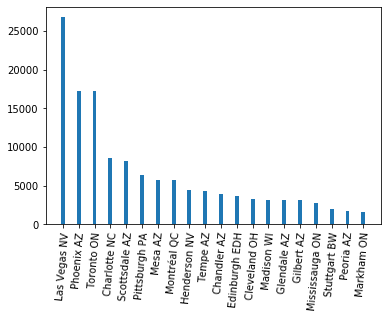

In [26]:
# we make the drawing 

plt.bar(x = top_20_business_cities_list, height = top_20_business_numbers_list, width = 0.25 )
plt.xticks(rotation=85)

In [27]:
# we take Las Vegas as example and constrain our data to the city

business_las_vegas_df = business_multi_set_df.copy()
business_las_vegas_df = business_las_vegas_df[business_las_vegas_df['city_name'] == 'Las Vegas NV']
business_las_vegas_df

,business_id,name,neighborhood,address,categories,stars,postal_code,latitude,longitude,review_count,is_open,city_name
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""","{'Property Management': 1, 'Real Estate': 1, '...",4.0,89128,36.207430,-115.268460,5,1,Las Vegas NV
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""","{'Sporting Goods': 1, 'Shopping': 1}",1.5,89128,36.197484,-115.249660,9,1,Las Vegas NV
26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""","{'Local Services': 1, 'Jewelry': 1, 'Shopping'...",4.5,89119,36.085051,-115.119421,23,1,Las Vegas NV
41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""","{'Local Services': 1, 'TV Mounting': 1, 'Light...",4.5,89113,36.056382,-115.269332,20,1,Las Vegas NV
48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""","{'Nurseries & Gardening': 1, 'Home & Garden': ...",3.5,89122,36.105196,-115.056880,25,1,Las Vegas NV
...,...,...,...,...,...,...,...,...,...,...,...,...
174539,swjz4q8gI79Ndg4APuHEUA,"""Stonegate Real Estate Services""",Westside,"""3030 S Jones Blvd, Ste 105""","{'Mortgage Brokers': 1, 'Home Services': 1, 'P...",4.5,89146,36.134355,-115.224462,15,1,Las Vegas NV
174545,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",NaN,"""591 N Eastern Ave, Ste 110""","{'Coffee & Tea': 1, 'Food': 1}",2.5,89101,36.173589,-115.116779,35,1,Las Vegas NV
174546,sH9WsMj8sNTTSAUWv4UEEg,"""Sprint Store""",Southwest,"""7325 S Rainbow Blvd, Ste 120""","{'Mobile Phone Accessories': 1, 'Mobile Phones...",4.0,89139,36.055130,-115.243488,35,1,Las Vegas NV
174552,9ouC6BpmjFpLfHeQnLQqng,"""9 Dragons Fight Shop""",Westside,"""3375 S Decatur Blvd, Ste 7""","{'Martial Arts': 1, 'Shopping': 1, 'Fashion': ...",5.0,89102,36.128780,-115.208990,5,1,Las Vegas NV


In [28]:
# the list of multisets in column 'categories' for the businesses in Las Vegas

las_vegas_multi_set_categories = business_las_vegas_df['categories']
list_las_vegas_multi_set_categories = list(las_vegas_multi_set_categories)
list_las_vegas_multi_set_categories

[Counter({'Property Management': 1,
          'Real Estate': 1,
          'Home Services': 1,
          'Real Estate Services': 1}),
 Counter({'Sporting Goods': 1, 'Shopping': 1}),
 Counter({'Local Services': 1,
          'Jewelry': 1,
          'Shopping': 1,
          'Watch Repair': 1}),
 Counter({'Local Services': 1,
          'TV Mounting': 1,
          'Lighting Fixtures & Equipment': 1,
          'Electricians': 1,
          'Home Services': 1}),
 Counter({'Nurseries & Gardening': 1, 'Home & Garden': 1, 'Shopping': 1}),
 Counter({'Performing Arts': 1, 'Arts & Entertainment': 1}),
 Counter({'Barbeque': 1,
          'Sports Bars': 1,
          'American (New)': 1,
          'Nightlife': 1,
          'Bars': 1,
          'Restaurants': 1}),
 Counter({'Fast Food': 1, 'Restaurants': 1, 'Sandwiches': 1}),
 Counter({'Gastropubs': 1,
          'American (New)': 1,
          'Restaurants': 1,
          'Arts & Entertainment': 1,
          'Arcades': 1}),
 Counter({'Automotive': 1, 'Auto 

In [29]:
# the 'big bag' of all businesses categories together in one bag for Las Vegas 
las_vegas_multi_set_total_categories = reduce (lambda c, x : x + c, list_las_vegas_multi_set_categories, Counter(set()))
las_vegas_multi_set_total_categories

Counter({'Beauty & Spas': 2938,
         'Skin Care': 505,
         'Martial Arts': 105,
         'Shopping': 4558,
         'Fashion': 1355,
         'Fitness & Instruction': 582,
         'Kickboxing': 9,
         'Active Life': 1282,
         'Fitness/Exercise Equipment': 8,
         "Men's Clothing": 352,
         'Boxing': 27,
         'Sporting Goods': 214,
         'Sports Wear': 104,
         'Mobile Phone Accessories': 57,
         'Mobile Phones': 190,
         'Electronics': 246,
         'Coffee & Tea': 505,
         'Food': 2870,
         'Mortgage Brokers': 130,
         'Home Services': 3144,
         'Property Management': 219,
         'Real Estate': 1088,
         'Real Estate Agents': 281,
         'Commercial Real Estate': 64,
         'Real Estate Services': 349,
         'Day Spas': 387,
         'Nail Salons': 649,
         'Hair Salons': 993,
         'Massage': 399,
         'Nail Technicians': 40,
         'Garage Door Services': 44,
         'Fences & Gates':

In [30]:
# the set of all categories which happens to be in business in Las Vegas

las_vegas_set_total_categories = set(las_vegas_multi_set_total_categories)
las_vegas_set_total_categories

{'Landscape Architects',
 'Community Service/Non-Profit',
 "Children's Clothing",
 'Tutoring Centers',
 'Tanning',
 'Buffets',
 'Rodeo',
 'Modern European',
 'Mobile Home Parks',
 'Mosques',
 'Restaurants',
 'Health Markets',
 'Newspapers & Magazines',
 'Mexican',
 'Commercial Truck Repair',
 'Pet Photography',
 'Gas Stations',
 'Striptease Dancers',
 'Keys & Locksmiths',
 'Rugs',
 'Bike tours',
 'Shoe Repair',
 'Pain Management',
 'Home Window Tinting',
 'Na',
 'Stadiums & Arenas',
 'Guamanian',
 'Duty-Free Shops',
 'Crane Services',
 'Dinner Theater',
 'Windows Installation',
 'Event Planning & Services',
 'RV Parks',
 'Bicycles',
 'Smog Check Stations',
 'Circuit Training Gyms',
 'Kosher',
 'Farmers Market',
 'Hot Air Balloons',
 'Candy Stores',
 'Rest Stops',
 'French',
 'Yoga',
 'Sports Psychologists',
 'Massage Schools',
 'Parking',
 'Pop-Up Restaurants',
 'Middle Schools & High Schools',
 'Pool Halls',
 'Brewing Supplies',
 'Vegetarian',
 'Ukrainian',
 'Motorsport Vehicle Repair

In [31]:
# the list of (category, quantity in total for Las Vegas) pairs , for the 5 most common businesses

las_vegas_top_5 = las_vegas_multi_set_total_categories.most_common(5)
las_vegas_top_5

[('Restaurants', 5899),
 ('Shopping', 4558),
 ('Home Services', 3144),
 ('Beauty & Spas', 2938),
 ('Food', 2870)]

In [32]:
# the list of the 5 most common categories 

ls_vgs_top_5_categories = list(map(lambda x: x[0], las_vegas_top_5))
ls_vgs_top_5_categories

['Restaurants', 'Shopping', 'Home Services', 'Beauty & Spas', 'Food']

In [33]:
# we read the file

business_hours_df = pd.read_csv('./YelpCompleteData_no_review_no_user/yelp_business_hours.csv')
business_hours_df.head()

FileNotFoundError: [Errno 2] File b'./YelpCompleteData_no_review_no_user/yelp_business_hours.csv' does not exist: b'./YelpCompleteData_no_review_no_user/yelp_business_hours.csv'

In [ ]:
# we read the file 

business_checkin_df = pd.read_csv('./YelpCompleteData_no_review_no_user/yelp_checkin.csv')
business_checkin_df.head()

In [ ]:
business_checkin_df.info()

In [ ]:
business_checkin_df.iloc[0].loc['weekday']

In [ ]:
type(business_checkin_df.iloc[0].loc['weekday'])

In [ ]:
# we transform hours from string to int

business_checkin_int_df = business_checkin_df.copy()
business_checkin_int_df['hour'] = business_checkin_df['hour'].apply(lambda x: int(x.split(':')[0]))
business_checkin_int_df.head()

In [ ]:
# convert list of 5 top business categories for Las Vegas to 'bag'  : Counter"

las_vegas_top_5_cnter = Counter(ls_vgs_top_5_categories)
las_vegas_top_5_cnter

In [ ]:
business_las_vegas_df.info()

In [ ]:
# we filter business_las_vegas_df to keep business of only in the 5 top most common business categories for Las Vegas
# we can see the quantity of businesses decrease from 26764 to 17019
las_vegas_filter_for_5_top = business_las_vegas_df.copy()
condition = lambda x: (x & las_vegas_top_5_cnter) != Counter()
las_vegas_filter_for_5_top = las_vegas_filter_for_5_top[las_vegas_filter_for_5_top['categories'].map(condition)]
las_vegas_filter_for_5_top.info()


In [ ]:
# we merge las_vegas_filter_for_5_top  and business_checkin_int_df to analyse checkings in hours
las_vegas_checkin_df = pd.merge(las_vegas_filter_for_5_top, business_checkin_int_df, on ='business_id')
las_vegas_checkin_df.head()

In [ ]:
las_vegas_checkin_weekday_df = las_vegas_checkin_df.copy()
las_vegas_checkin_weekday_df['weekday'].head()

In [ ]:
# group by by hours and make bar plot

las_vegas_checkin_df.groupby('hour')['checkins'].sum().plot(kind = 'bar')

In [ ]:
#we do the same analysis but now for every separate day of a week
business_checkin_weekdays = list(business_checkin_df['weekday'].unique())
business_checkin_weekdays

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(15, 10))
for day in business_checkin_weekdays:
    j = business_checkin_weekdays.index(day)
    
    filter = las_vegas_checkin_weekday_df['weekday']== day
    x = int(j%2)
    y = int(j/2)
    
    
    las_vegas_checkin_weekday_df.where(filter).groupby('hour')['checkins'].sum().plot(kind = 'bar', ax = ax[x, y] )
    
#x = i % width;    // % is the "modulo operator", the remainder of i / width;
#y = i / width; 
    